In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# import numpy as np 
import re
import string 
import nltk
nltk.download('punkt')
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv("./drive/MyDrive/Semester8/STBI/wiki_movie_plots_deduped.csv", index_col=0)


In [ ]:
df.info

<bound method DataFrame.info of                                          Title Origin/Ethnicity  \
Release Year                                                      
1901                    Kansas Saloon Smashers         American   
1901             Love by the Light of the Moon         American   
1901                   The Martyred Presidents         American   
1901          Terrible Teddy, the Grizzly King         American   
1902                    Jack and the Beanstalk         American   
...                                        ...              ...   
2014                         The Water Diviner          Turkish   
2017                        Çalgı Çengi İkimiz          Turkish   
2017                              Olanlar Oldu          Turkish   
2017                          Non-Transferable          Turkish   
2017                        İstanbul Kırmızısı          Turkish   

                                        Director  \
Release Year                                

In [ ]:
df.describe(include=object)

,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
count,34886,34886,34886,33464,34886,34886,34886
unique,32432,24,12593,32182,2265,34070,33869
top,Cinderella,American,Unknown,Tom and Jerry,unknown,https://en.wikipedia.org/wiki/Digimon_Adventur...,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou..."
freq,8,17377,1124,80,6083,5,6


In [ ]:
df.isna().sum()

Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

In [ ]:
result = df.drop(['Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page'], axis = 1)

In [ ]:
result

,Title,Genre,Plot
Release Year,,,
1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr..."
1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov..."
1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed..."
1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...
1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...
...,...,...,...
2014,The Water Diviner,unknown,"The film begins in 1919, just after World War ..."
2017,Çalgı Çengi İkimiz,comedy,"Two musicians, Salih and Gürkan, described the..."
2017,Olanlar Oldu,comedy,"Zafer, a sailor living with his mother Döndü i..."


In [ ]:
print(str(result.describe(include=object)))

             Title    Genre                                               Plot
count        34886    34886                                              34886
unique       32432     2265                                              33869
top     Cinderella  unknown  (マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...
freq             8     6083                                                  6


In [ ]:
result =result.drop_duplicates('Plot')
result.describe()

,Title,Genre,Plot
count,33869,33869,33869
unique,31977,2192,33869
top,Cinderella,drama,"A bartender is working at a saloon, serving dr..."
freq,7,5860,1


In [ ]:
# remove number
def remove_number(text):
    return  re.sub(r"\[0-9]+", "", str(text))
 
result['Plot'] = result['Plot'].apply(remove_number)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# remove punctuation
def punctuation(txt):
  return re.sub(r"[^\w\s]","", str(txt))

result['Plot'] = result['Plot'].apply(punctuation)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# tokenization
def word_tokenize_wrapper(text):
  return word_tokenize(text)
result = result['Plot'].apply(word_tokenize_wrapper)

In [ ]:
#stopword removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)
def stopword(text):
  words = [word for word in text if word.lower() not in sw_nltk]
  return words
result = result.apply(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
result

Release Year
1901    [bartender, working, saloon, serving, drinks, ...
1901    [moon, painted, smiling, face, hangs, park, ni...
1901    [film, minute, long, composed, two, shots, fir...
1901    [Lasting, 61, seconds, consisting, two, shots,...
1902    [earliest, known, adaptation, classic, fairyta...
                              ...                        
2014    [film, follows, elevenyearold, boy, named, Asl...
2017    [Two, musicians, Salih, Gürkan, described, adv...
2017    [Zafer, sailor, living, mother, Döndü, coastal...
2017    [film, centres, around, young, woman, named, A...
2017    [writer, Orhan, Şahin, returns, İstanbul, many...
Name: Plot, Length: 33869, dtype: object

In [ ]:
#normalization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def lemma(text):
  lemmatizer = WordNetLemmatizer()
  Output= [lemmatizer.lemmatize(words_sent) for words_sent in text]
  return Output
result = result.apply(lemma)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
result.head()

Release Year
1901    [bartender, working, saloon, serving, drink, c...
1901    [moon, painted, smiling, face, hang, park, nig...
1901    [film, minute, long, composed, two, shot, firs...
1901    [Lasting, 61, second, consisting, two, shot, f...
1902    [earliest, known, adaptation, classic, fairyta...
Name: Plot, dtype: object

In [ ]:
#word embedding
from gensim.models import FastText
model = FastText(result,  window=5,  min_count=5,   sg=1 ,size = 200)

In [ ]:
fasttext = model.wv

In [ ]:
fasttext.similar_by_word("moon", topn=5)

[('fullmoon', 0.743504524230957),
 ('moonlight', 0.7376183271408081),
 ('moonlighting', 0.7136588096618652),
 ('mooning', 0.6914658546447754),
 ('eclipsed', 0.687670111656189)]

In [ ]:
fasttext.get_vector('moon')

array([ 0.10312438,  0.05913728,  0.08126647, -0.1740665 , -0.03519392,
       -0.25567424, -0.19957957,  0.12243085,  0.13962986,  0.10401208,
       -0.12825163, -0.15535837, -0.618083  , -0.38556835, -0.3685807 ,
        0.08515002,  0.37504166, -0.24405736, -0.39573163,  0.0215664 ,
       -0.05522411,  0.05272481, -0.42954323,  0.2740605 ,  0.5540412 ,
        0.30928805, -0.0354096 , -0.03576476,  0.06685276,  0.03347394,
       -0.21175686, -0.30729118,  0.2519637 , -0.05942947, -0.39994577,
       -0.2114439 , -0.37437192, -0.6893602 ,  0.22681531,  0.0019329 ,
       -0.06181175, -0.20685917, -0.5175328 , -0.05205783,  0.2549801 ,
        0.05680652, -0.5288616 ,  0.13456024, -0.0289307 , -0.23707022,
        0.43041185, -0.05529362,  0.4174359 , -0.27538422,  0.2212479 ,
       -0.03327371,  0.2516384 ,  0.10364995,  0.35520834,  0.35740936,
        0.09812567, -0.04032316,  0.07871911, -0.3222268 , -0.7244035 ,
       -0.26037455,  0.24205767,  0.09480205,  0.02399155, -0.34

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(data):
    tfidf = TfidfVectorizer( stop_words='english',use_idf=True)
    tfidf_matrix = tfidf.fit_transform(data)
    return tfidf_matrix

In [ ]:
# Let's create a matrix with tfidf for the column abstract
tfidf_matrix = tfidf(df['Plot'])

In [ ]:
# in order to explore which documents have more similar respresentaiton, consine simliartiy can be used
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_matrix[0:1], tfidf_matrix).flatten()

# 10 most related documents indices
related_docs_indices = cosine_similarities.argsort()[:-11:-1]
print("Related Document:",related_docs_indices)

# Cosine Similarties of related documents
print("Cosine Similarites of related documents",cosine_similarities[related_docs_indices])

Related Document: [    0 16469 14017  9228 15523 15929   231  8307  6024 18496]
Cosine Similarites of related documents [1.         0.15179715 0.15148911 0.14949147 0.12348549 0.12267833
 0.11271582 0.10805585 0.10767625 0.10554338]


In [ ]:
df.iloc[0]['Plot']

"A bartender is working at a saloon, serving drinks to customers. After he fills a stereotypically Irish man's bucket with beer, Carrie Nation and her followers burst inside. They assault the Irish man, pulling his hat over his eyes and then dumping the beer over his head. The group then begin wrecking the bar, smashing the fixtures, mirrors, and breaking the cash register. The bartender then sprays seltzer water in Nation's face before a group of policemen appear and order everybody to leave.[1]"

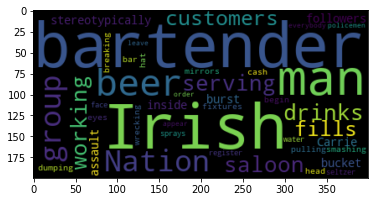

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(df.iloc[0]['Plot'])
plt.imshow(wordcloud, interpolation="bilinear")

In [ ]:
# importing KMeans library of sklearn
from sklearn.cluster import KMeans

def kmeans(n_clusters):
    kmean_model = KMeans(n_clusters = n_clusters,random_state=0)
    return kmean_model

In [ ]:
import gensim
from gensim.models import Doc2Vec

def doc2vec():
    document_tagged = []
    tagged_count = 0
    for _ in df['Plot'].values:
        document_tagged.append(gensim.models.doc2vec.TaggedDocument(_,[tagged_count]))
        tagged_count +=1 
    d2v = Doc2Vec(document_tagged)
    d2v.train(document_tagged,epochs=d2v.epochs,total_examples=d2v.corpus_count)
    return d2v.docvecs.vectors_docs

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(result):
    tfidf = TfidfVectorizer( stop_words='english',use_idf=True)
    tfidf_matrix = tfidf.fit_transform(result)
    return tfidf_matrix

In [ ]:
# Let's create a matrix with tfidf for the column abstract
tfidf_matrix = tfidf(df['Plot'].values.astype('U'))

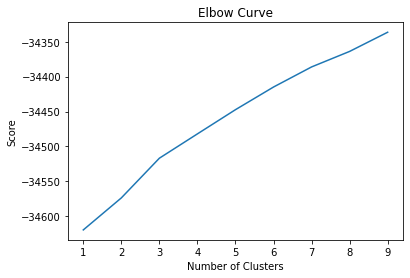

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

nc = range(1,10)
kmeans = [KMeans(n_clusters = i, n_init = 100, max_iter = 500) for i in nc]
score = [kmeans[i].fit(tfidf_matrix).score(tfidf_matrix) for i in range(len(kmeans))]
plt.plot(nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()